Shape of dataset: (4366, 35)


,YearWeek,temp_mean_C,temp_max_C,temp_min_C,rain_sum,sunshine_duration,daylight_duration,wind_speed_max,et0_evapotranspiration,District_anuradhapura,...,District_matara,District_monaragala,District_mullaitivu,District_nuwara eliya,District_polonnaruwa,District_puttalam,District_ratnapura,District_trincomalee,District_vavuniya,risk_level
0,2022-W01,-0.959489,-0.849928,-0.423251,0.339925,-0.745342,-1.376816,-0.014035,-1.440448,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-W01,-0.715774,-0.502382,-0.337936,-0.646809,0.438579,-1.570933,-0.174945,-0.804776,1,...,0,0,0,0,0,0,0,0,0,0
2,2022-W01,-2.384842,-2.240112,-2.001570,1.073927,-1.401267,-1.325196,-1.124318,-1.914984,0,...,0,0,0,0,0,0,0,0,0,1
3,2022-W01,-0.543415,-1.093210,0.173951,0.778175,-0.009423,-1.454355,0.339969,-1.189135,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-W01,-0.091161,0.227465,0.045979,-0.275776,0.185420,-1.312302,0.179058,-0.030144,0,...,0,0,0,0,0,0,0,0,0,1


✅ Dropped 'YearWeek' column
Remaining columns: ['temp_mean_C', 'temp_max_C', 'temp_min_C', 'rain_sum', 'sunshine_duration', 'daylight_duration', 'wind_speed_max', 'et0_evapotranspiration', 'District_anuradhapura', 'District_badulla', 'District_batticaloa', 'District_colombo', 'District_galle', 'District_gampaha', 'District_hambantota', 'District_jaffna', 'District_kalmunai', 'District_kalutara', 'District_kandy', 'District_kegalle', 'District_kilinochchi', 'District_kurunegala', 'District_mannar', 'District_matale', 'District_matara', 'District_monaragala', 'District_mullaitivu', 'District_nuwara eliya', 'District_polonnaruwa', 'District_puttalam', 'District_ratnapura', 'District_trincomalee', 'District_vavuniya', 'risk_level']
Shape of features (scaled): (4366, 33)
Shape of target: (4366,)


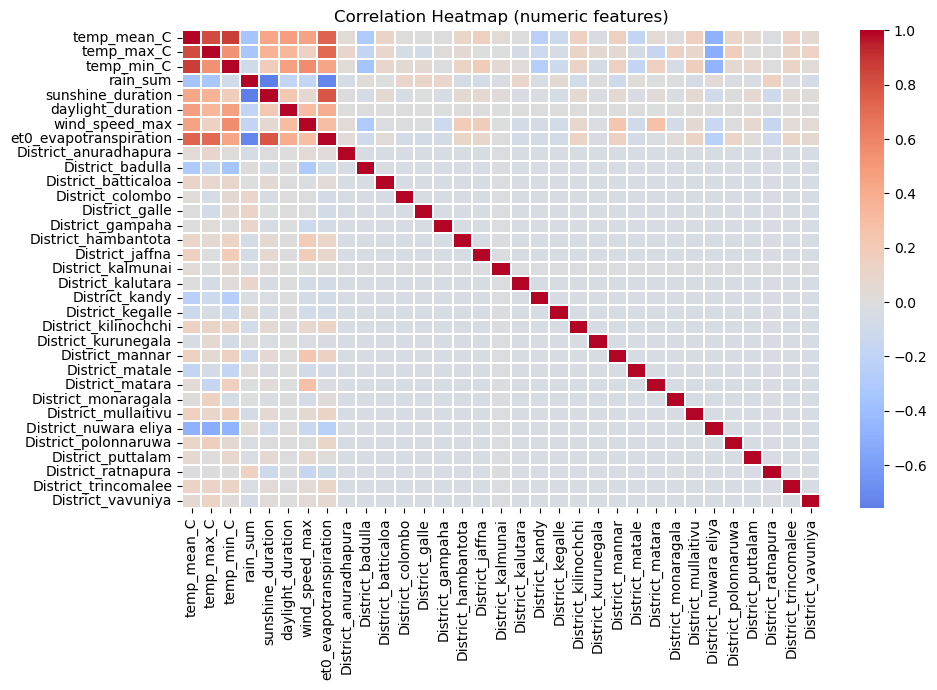

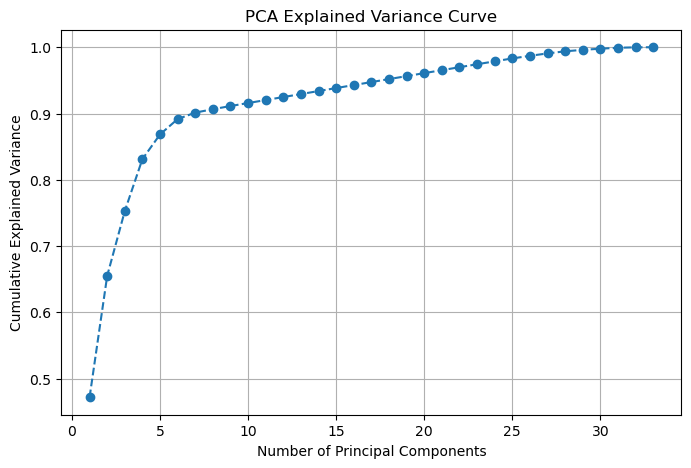

✅ Keeping 7 principal components (cover ≥90% variance)
PCA-transformed shape: (4366, 7)
✅ Saved PCA dataset to DengueRisk_Final_processed_dataset.csv


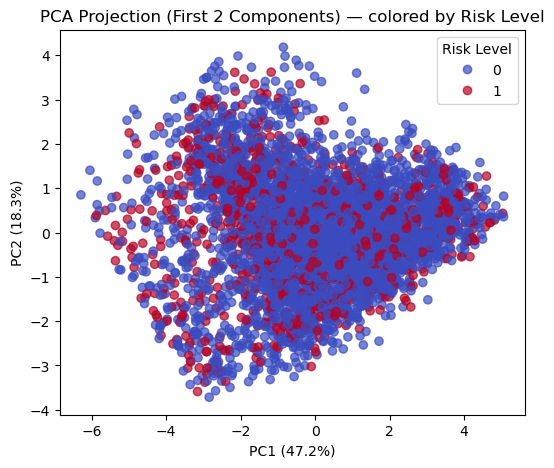

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# --- 1) Load dataset ---
csv_path = "DengueRisk_(Scaling  normalization (StandardScaler)].csv"
df = pd.read_csv(csv_path)

print("Shape of dataset:", df.shape)
display(df.head())

# --- 2) Drop YearWeek if present ---
df = df.drop(columns=["YearWeek"], errors="ignore")
print("✅ Dropped 'YearWeek' column")
print("Remaining columns:", df.columns.tolist())

# --- 3) Separate target and features ---
assert "risk_level" in df.columns, "Target column 'risk_level' not found!"
y = df["risk_level"].astype(int)
X_scaled = df.drop(columns=["risk_level"]).values  # scaled features

print("Shape of features (scaled):", X_scaled.shape)
print("Shape of target:", y.shape)

# --- 4) EDA: Correlation Heatmap ---
plt.figure(figsize=(10, 7))
corr = df.drop(columns=["risk_level"]).corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.3)
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.show()

# --- 5) PCA: fit with all components ---
pca_full = PCA()
pca_full.fit(X_scaled)

explained_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# Variance curve
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Curve")
plt.grid(True)
plt.show()

# --- 6) Choose k PCs (≥90% variance) ---
k = int(np.argmax(cum_var >= 0.90)) + 1
print(f"✅ Keeping {k} principal components (cover ≥90% variance)")

# --- 7) Apply PCA with selected k ---
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

print("PCA-transformed shape:", X_pca.shape)

# --- 8) Build PCA DataFrame with target ---
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, k+1)])
pca_df["risk_level"] = y.values

# --- 9) Save to CSV ---
output_file = "DengueRisk_Final_processed_dataset.csv"
pca_df.to_csv(output_file, index=False)
print(f"✅ Saved PCA dataset to {output_file}")

# --- 10) 2D PCA scatter plot ---
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(6,5))
    scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.title("PCA Projection (First 2 Components) — colored by Risk Level")
    plt.legend(*scatter.legend_elements(), title="Risk Level")
    plt.show()